## 1.Start

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from autogluon.tabular import TabularPredictor
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/KP-BMKG-MLATI-2025/Model-Prediksi-PM2.5/CleanedPM25Data.csv'
original_df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
original_df.head()

Mounted at /content/drive


,Tanggal,conc,Unnamed: 0,ID Stasiun,Nama Stasiun,Lattitude,Longitude,rr,rr_flag,ws_avg,ws_avg_flag,ws_max,ws_max_flag,wd_avg,wd_avg_flag,tt_air_max,tt_air_max_flag,tt_air_avg,tt_air_avg_flag,tt_air_min,tt_air_min_flag,rh_avg,rh_avg_flag,pp_air,pp_air_flag,sr_avg,sr_avg_flag,sr_max,sr_max_flag,nr,nr_flag,wl,wl_flag,tt_sea,tt_sea_flag,tt_pan,tt_pan_flag,ws_50cm,ws_50cm_flag,wl_pan,wl_pan_flag,ev_pan,ev_pan_flag,konduktivitas,konduktivitas_flag,ph_sea,ph_sea_flag
0,2023-07-01 00:00:00,16.1,0,160021,AWS Staklim Mlati,-7.731175,110.353686,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0
1,2023-07-01 01:00:00,4.3,7,160021,AWS Staklim Mlati,-7.731175,110.353686,0.0,NaN,1.538,NaN,3.354157,NaN,142.3,NaN,26.15,NaN,25.74,NaN,25.48,NaN,84.50,NaN,992.7007,NaN,389.3,NaN,419.7,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0
2,2023-07-01 02:00:00,10.5,13,160021,AWS Staklim Mlati,-7.731175,110.353686,0.0,NaN,1.450,NaN,3.536449,NaN,210.0,NaN,26.81,NaN,26.51,NaN,26.36,NaN,76.35,NaN,992.7735,NaN,148.3,NaN,452.0,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0
3,2023-07-01 03:00:00,12.2,19,160021,AWS Staklim Mlati,-7.731175,110.353686,0.0,NaN,1.872,NaN,3.695551,NaN,229.3,NaN,28.15,NaN,27.88,NaN,27.73,NaN,70.66,NaN,992.6209,NaN,415.3,NaN,844.0,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0
4,2023-07-01 04:00:00,21.5,25,160021,AWS Staklim Mlati,-7.731175,110.353686,0.0,NaN,1.823,NaN,4.424048,NaN,215.4,NaN,28.92,NaN,28.52,NaN,28.09,NaN,68.88,NaN,991.8495,NaN,855.0,NaN,888.0,NaN,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0


In [ ]:
df = original_df.copy()

# 2.Data Preparation

## Drop Useless Columns

In [ ]:
def drop_columns(df):
  cols_to_drop = ['Unnamed: 0', 'ID Stasiun', 'Nama Stasiun', 'Lattitude', 'Longitude', 'Tanggal']
  flag_cols = [col for col in df.columns if col.endswith('flag')]
  cols_to_drop.extend(flag_cols)
  df = df.drop(columns=cols_to_drop, errors='ignore')
  return df

df = drop_columns(df)
df.head()

,conc,rr,ws_avg,ws_max,wd_avg,tt_air_max,tt_air_avg,tt_air_min,rh_avg,pp_air,sr_avg,sr_max,nr,wl,tt_sea,tt_pan,ws_50cm,wl_pan,ev_pan,konduktivitas,ph_sea
0,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.3,0.0,1.538,3.354157,142.3,26.15,25.74,25.48,84.50,992.7007,389.3,419.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.5,0.0,1.450,3.536449,210.0,26.81,26.51,26.36,76.35,992.7735,148.3,452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12.2,0.0,1.872,3.695551,229.3,28.15,27.88,27.73,70.66,992.6209,415.3,844.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.5,0.0,1.823,4.424048,215.4,28.92,28.52,28.09,68.88,991.8495,855.0,888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conc           4315 non-null   float64
 1   rr             4190 non-null   float64
 2   ws_avg         4190 non-null   float64
 3   ws_max         4190 non-null   float64
 4   wd_avg         4190 non-null   float64
 5   tt_air_max     4190 non-null   float64
 6   tt_air_avg     4190 non-null   float64
 7   tt_air_min     4190 non-null   float64
 8   rh_avg         4190 non-null   float64
 9   pp_air         4190 non-null   float64
 10  sr_avg         4190 non-null   float64
 11  sr_max         4190 non-null   float64
 12  nr             0 non-null      float64
 13  wl             0 non-null      float64
 14  tt_sea         0 non-null      float64
 15  tt_pan         0 non-null      float64
 16  ws_50cm        0 non-null      float64
 17  wl_pan         0 non-null      float64
 18  ev_pan  

In [ ]:
df = df.drop(columns=['nr', 'wl', 'tt_sea', 'tt_pan', 'ws_50cm', 'wl_pan', 'ev_pan', 'konduktivitas', 'ph_sea'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conc        4315 non-null   float64
 1   rr          4190 non-null   float64
 2   ws_avg      4190 non-null   float64
 3   ws_max      4190 non-null   float64
 4   wd_avg      4190 non-null   float64
 5   tt_air_max  4190 non-null   float64
 6   tt_air_avg  4190 non-null   float64
 7   tt_air_min  4190 non-null   float64
 8   rh_avg      4190 non-null   float64
 9   pp_air      4190 non-null   float64
 10  sr_avg      4190 non-null   float64
 11  sr_max      4190 non-null   float64
dtypes: float64(12)
memory usage: 404.8 KB


## Drops rows where all columns are NaN

In [ ]:
# Identify rows where all columns except 'conc' are NaN
rows_to_drop = df[df.drop('conc', axis=1).isnull().all(axis=1)].index
rows_to_drop

Index([   0,  240,  288,  335,  377,  378,  379,  380,  381,  382,
       ...
       4249, 4250, 4251, 4254, 4255, 4256, 4257, 4279, 4280, 4281],
      dtype='int64', length=127)

In [ ]:
# Drop the identified rows
df = df.drop(rows_to_drop)

# Display the updated DataFrame (optional)
df

,conc,rr,ws_avg,ws_max,wd_avg,tt_air_max,tt_air_avg,tt_air_min,rh_avg,pp_air,sr_avg,sr_max
1,4.3,0.0,1.538,3.354157,142.30,26.15,25.74,25.48,84.50,992.7007,389.30,419.70
2,10.5,0.0,1.450,3.536449,210.00,26.81,26.51,26.36,76.35,992.7735,148.30,452.00
3,12.2,0.0,1.872,3.695551,229.30,28.15,27.88,27.73,70.66,992.6209,415.30,844.00
4,21.5,0.0,1.823,4.424048,215.40,28.92,28.52,28.09,68.88,991.8495,855.00,888.00
5,13.8,0.0,2.155,4.196252,216.70,28.90,28.66,28.55,64.16,991.2545,229.40,243.10
...,...,...,...,...,...,...,...,...,...,...,...,...
4312,9.6,20.4,1.677,2.727600,209.20,24.65,24.42,24.30,95.50,988.6310,0.00,0.00
4313,9.7,20.4,0.944,2.179876,136.40,24.65,24.39,24.27,97.20,988.3477,0.00,0.00
4314,9.5,20.4,0.479,1.610032,36.16,24.65,24.42,24.31,99.20,988.3480,0.00,0.00
4315,9.5,20.4,0.747,1.182918,30.32,24.42,24.16,24.07,-999.00,988.7148,0.00,0.00


In [ ]:
df = df.dropna(subset=['conc'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4189 entries, 1 to 4316
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conc        4189 non-null   float64
 1   rr          4189 non-null   float64
 2   ws_avg      4189 non-null   float64
 3   ws_max      4189 non-null   float64
 4   wd_avg      4189 non-null   float64
 5   tt_air_max  4189 non-null   float64
 6   tt_air_avg  4189 non-null   float64
 7   tt_air_min  4189 non-null   float64
 8   rh_avg      4189 non-null   float64
 9   pp_air      4189 non-null   float64
 10  sr_avg      4189 non-null   float64
 11  sr_max      4189 non-null   float64
dtypes: float64(12)
memory usage: 425.4 KB


## Detecting Outliers

In [ ]:
def plot_boxplots(df, features):
  plt.figure(figsize=(12, 4))
  sns.set_style("whitegrid")

  for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    sns.boxplot(x=df[feature], color='orange')
    plt.title(f'Boxplot of {feature}', fontsize=15)
    plt.xlabel(feature, fontsize=12)

  plt.tight_layout()
  plt.show()

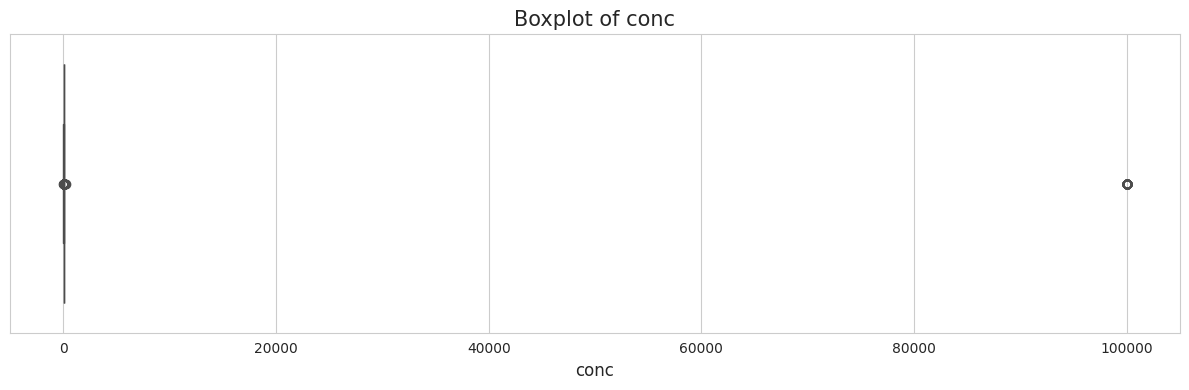

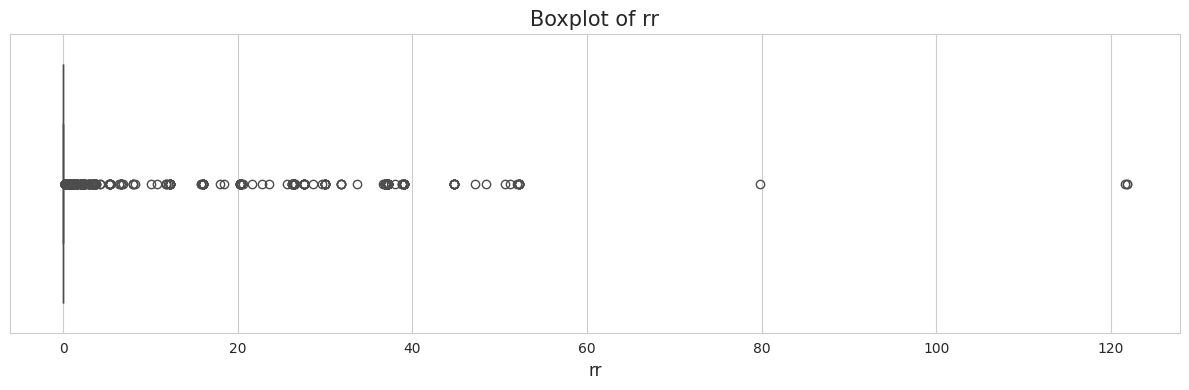

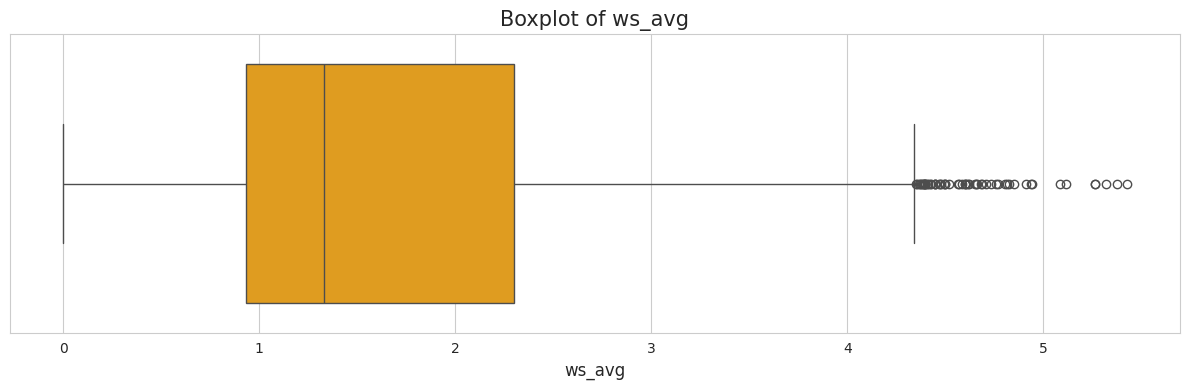

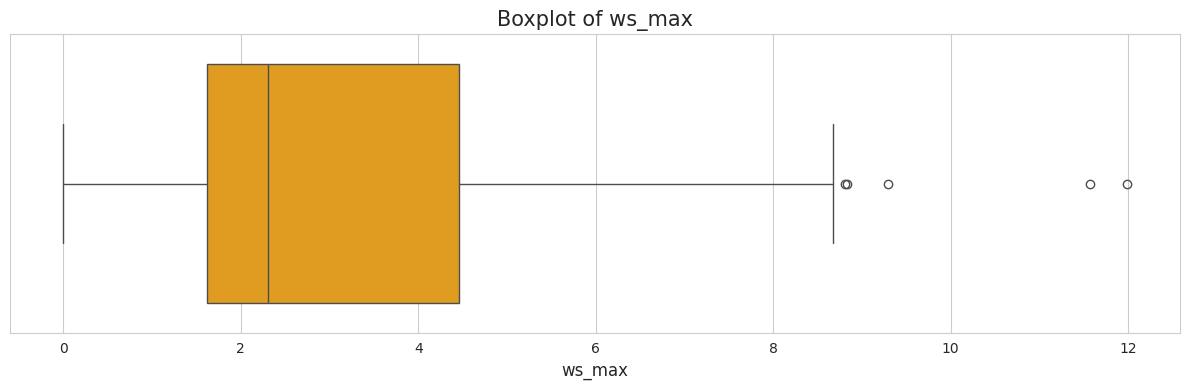

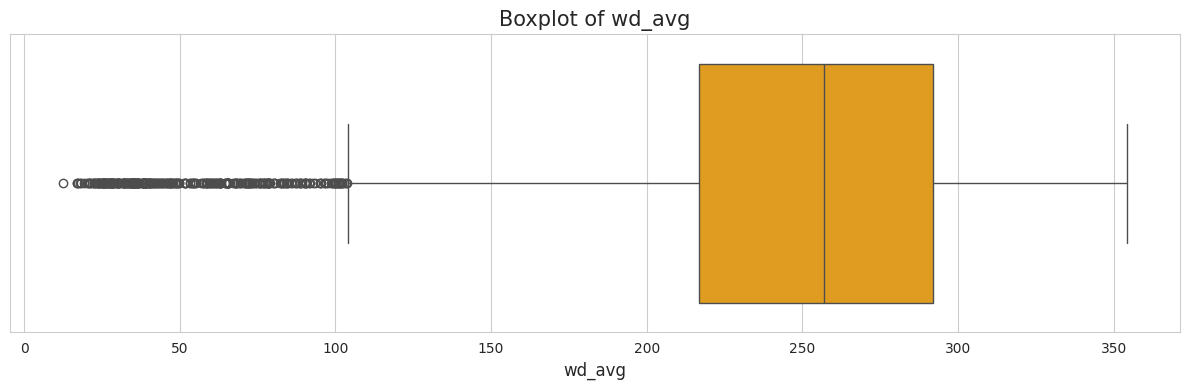

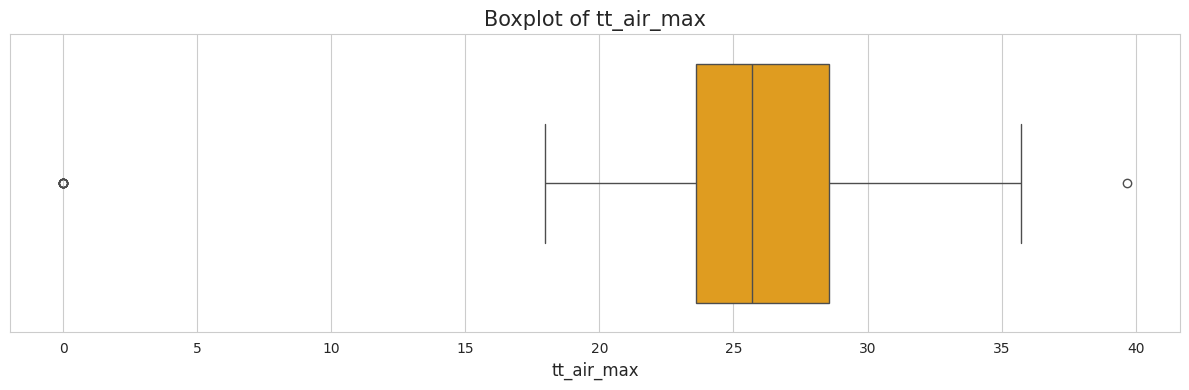

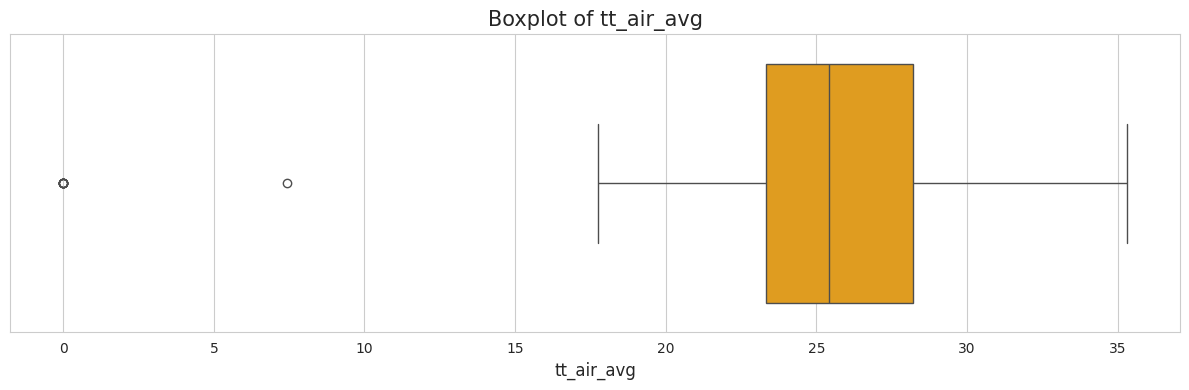

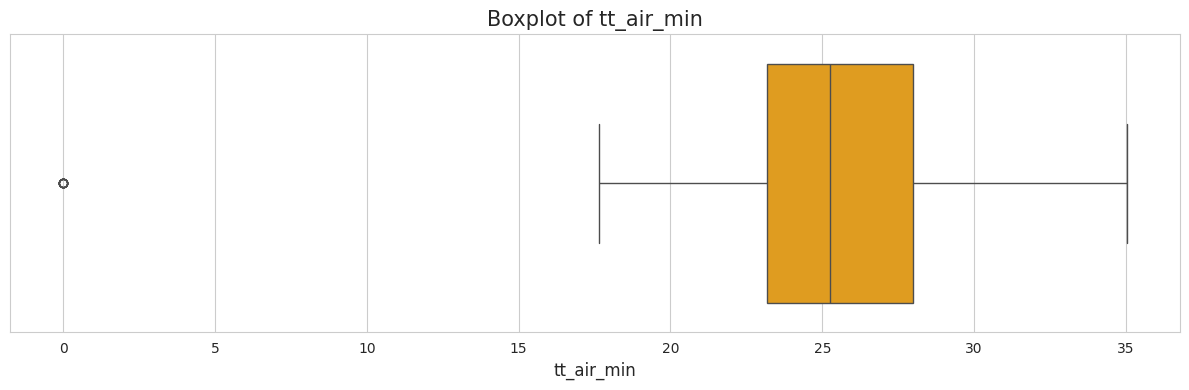

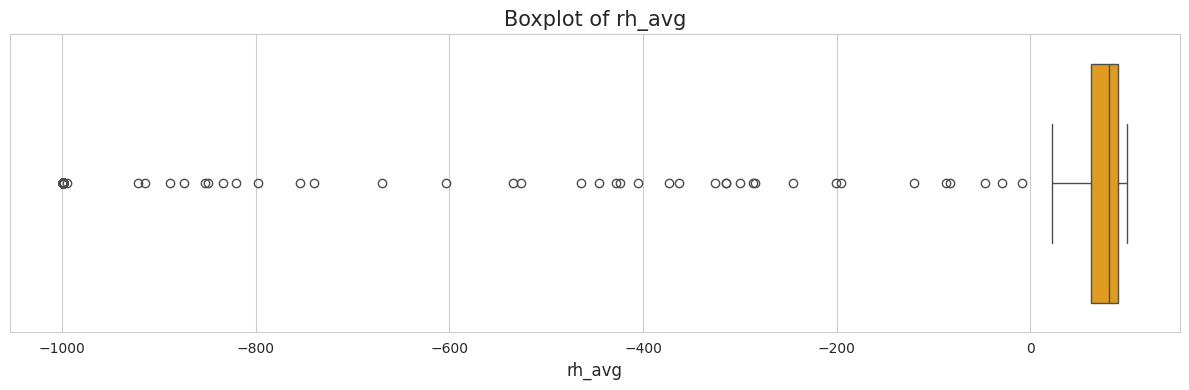

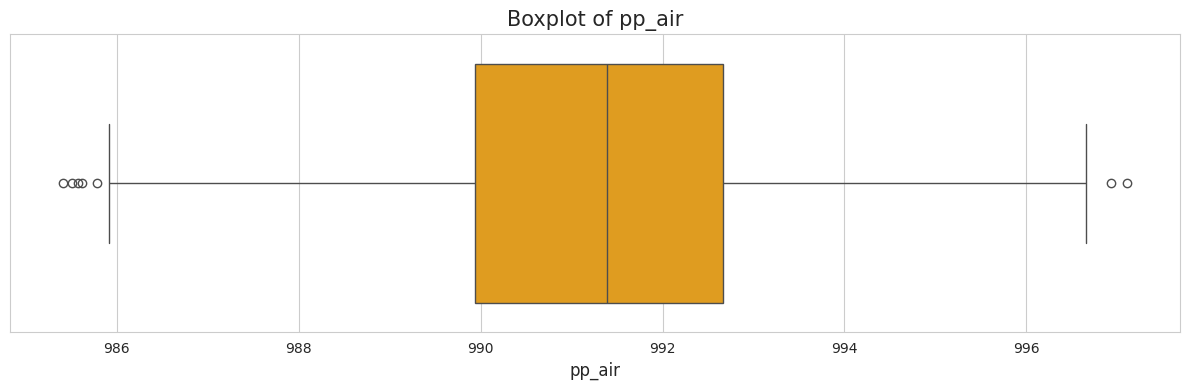

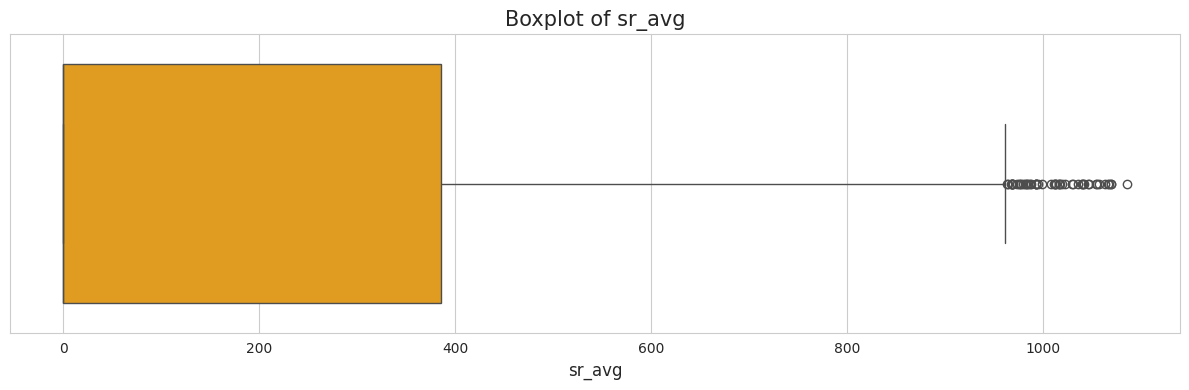

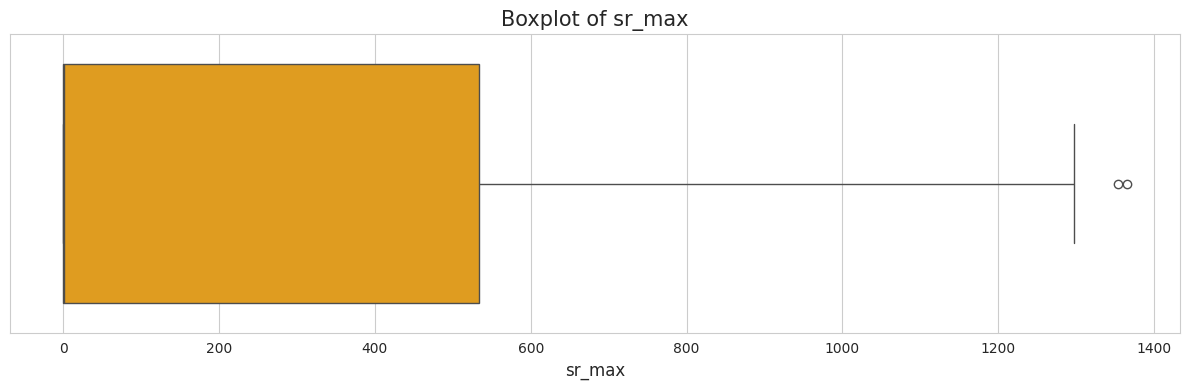

In [ ]:
for columname in df.columns:
  plot_boxplots(df, [columname])

In [ ]:
def plot_distributions(df, features):
  plt.figure(figsize=(12, 4 * len(features)))  # Adjust figure height based on the number of features
  sns.set_style("whitegrid")

  for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)

    # Use histplot if available (Seaborn >= 0.11.0), otherwise use distplot
    try:
        sns.histplot(df[feature], kde=True, color='skyblue')  # kde=True adds a kernel density estimate curve
    except AttributeError:
        sns.distplot(df[feature], color='skyblue')

    plt.title(f'Distribution of {feature}', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)  # Add y-label

  plt.tight_layout()
  plt.show()

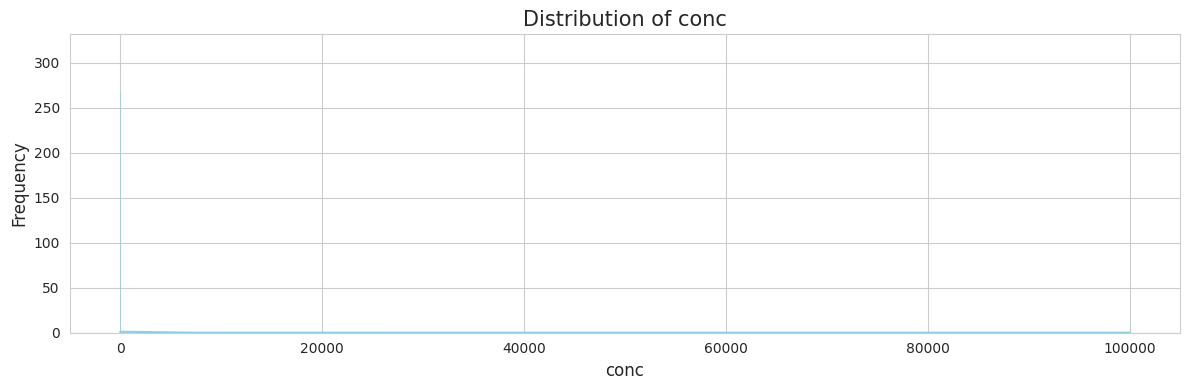

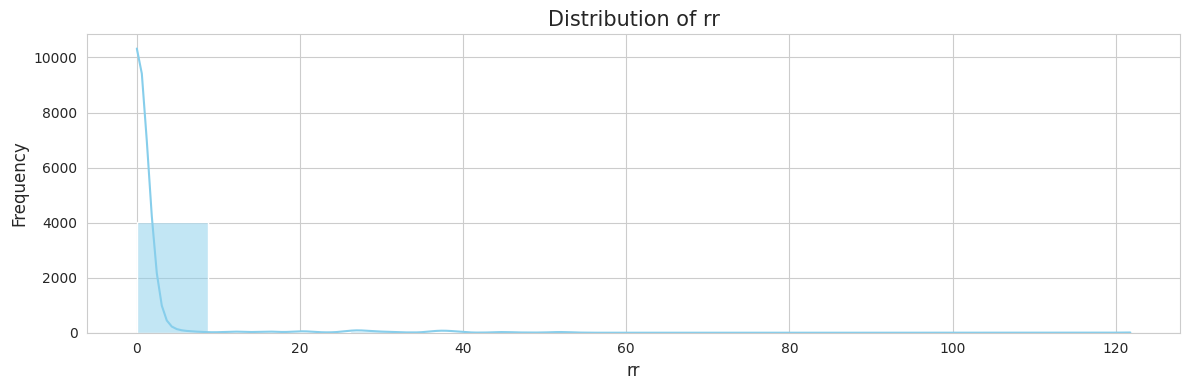

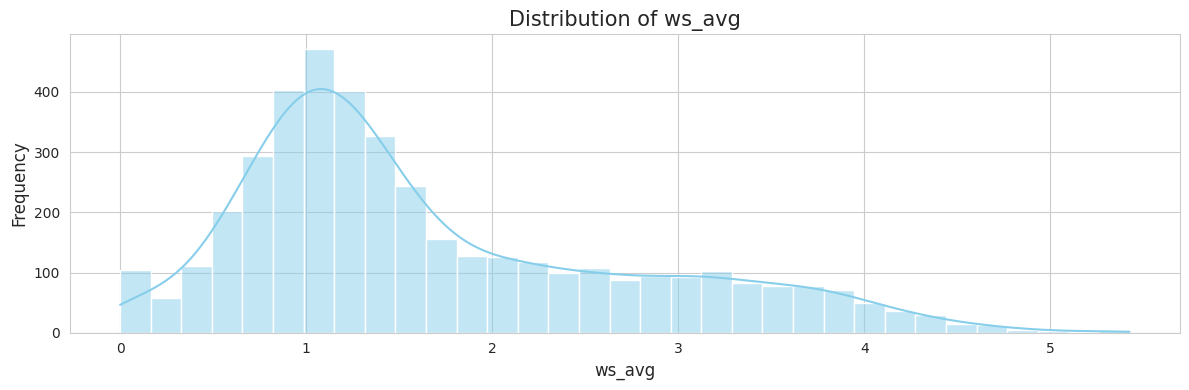

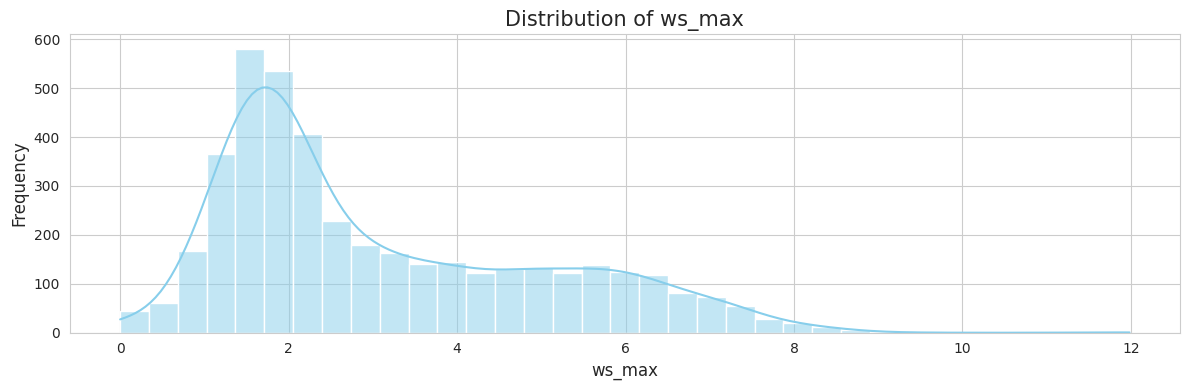

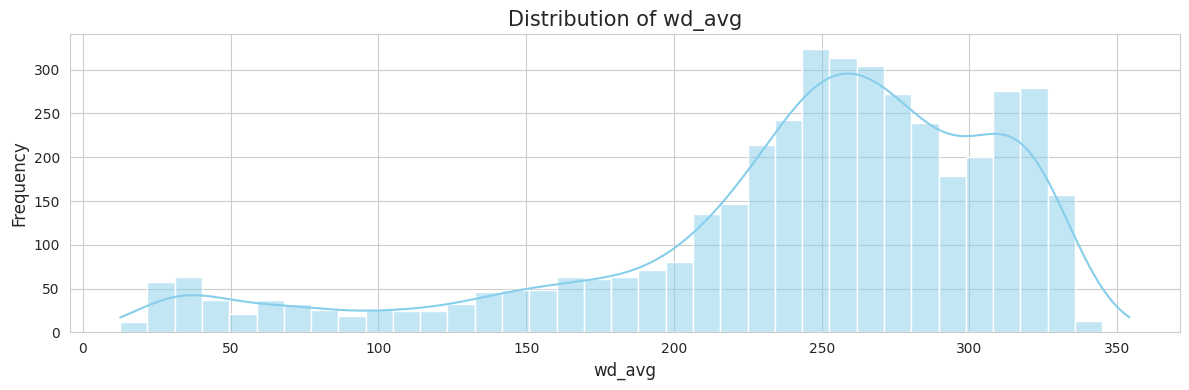

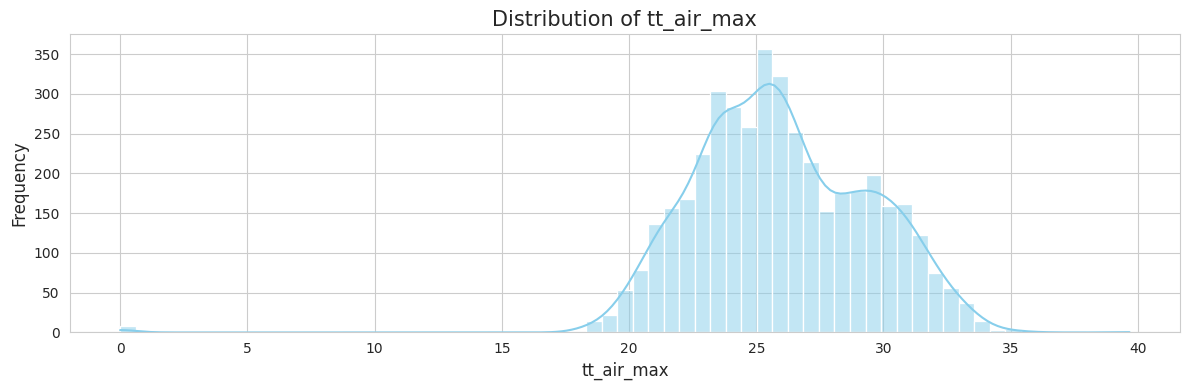

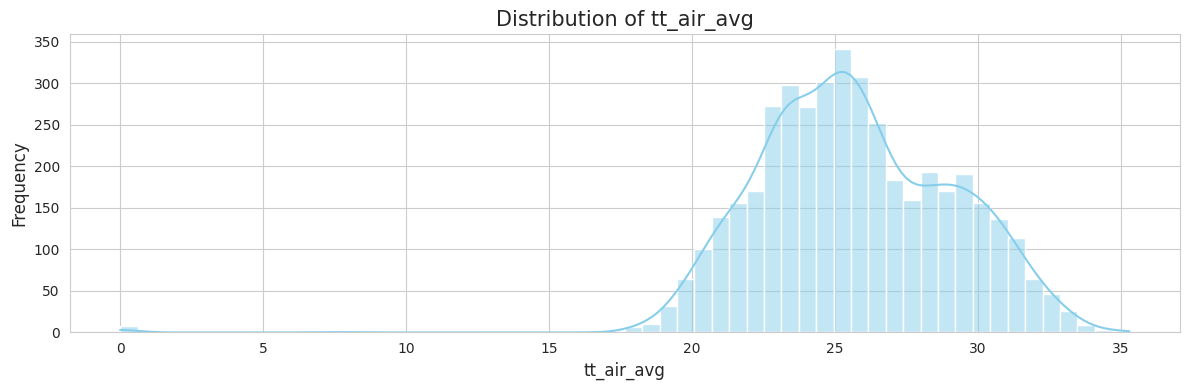

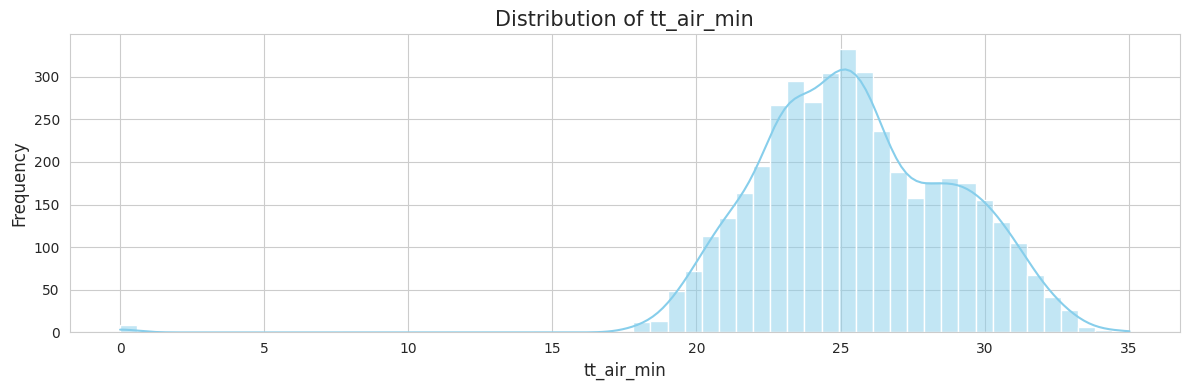

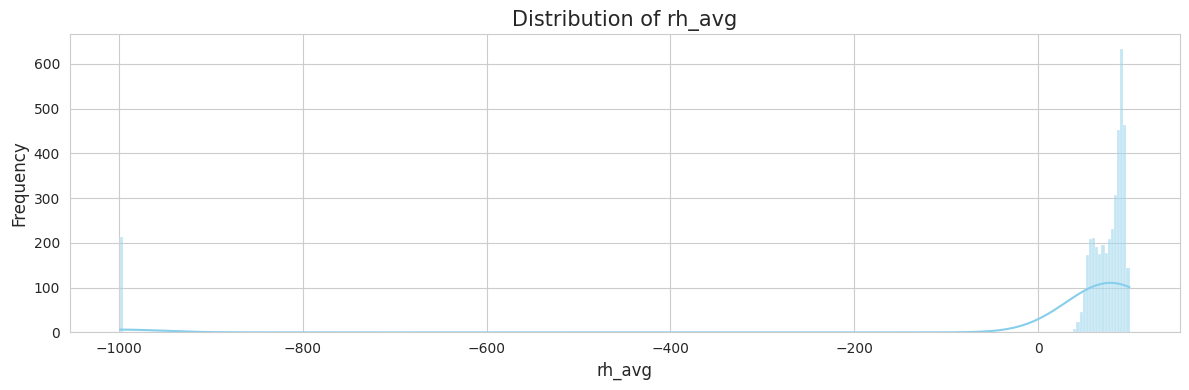

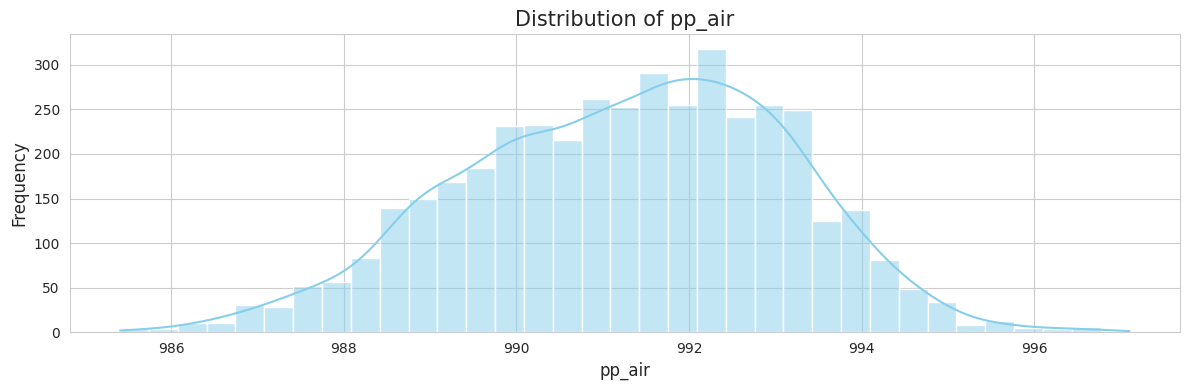

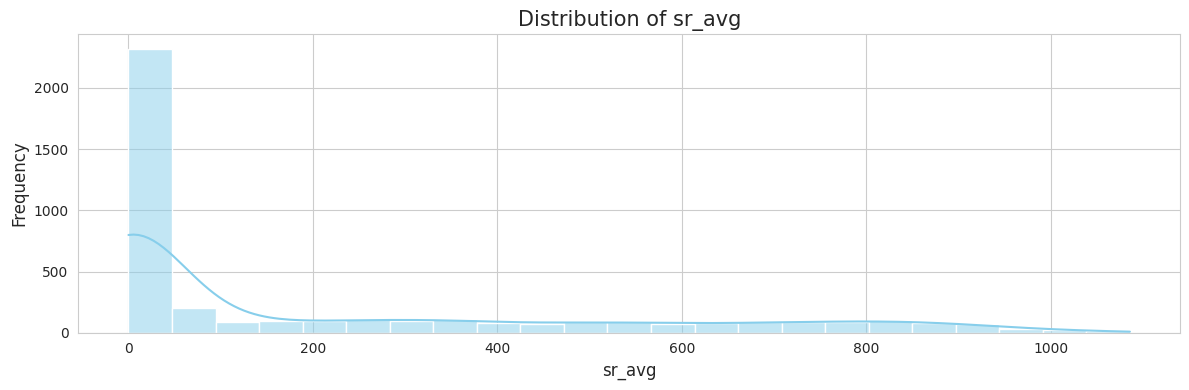

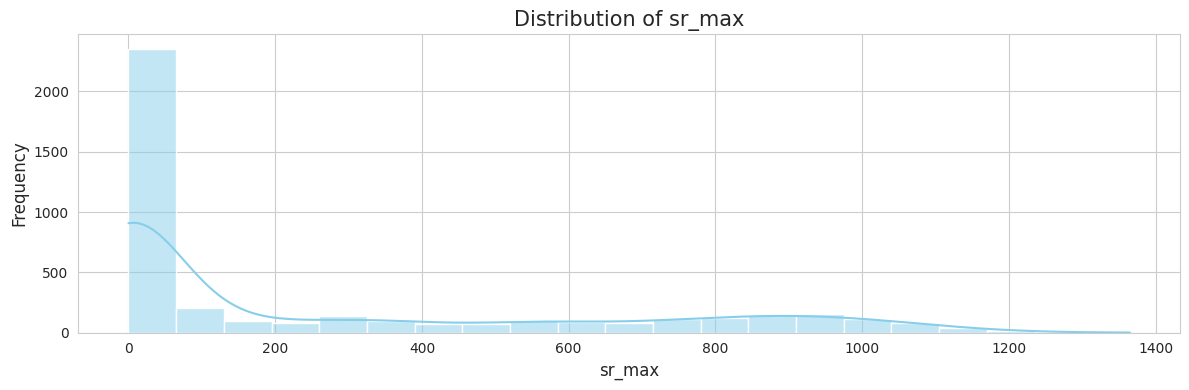

In [ ]:
for columname in df.columns:
  plot_distributions(df, [columname])

removing tt < 15 and negative rh_avg

In [ ]:
df = df[~((df['tt_air_max'] < 15) | (df['tt_air_min'] < 15) | (df['tt_air_avg'] < 15))]
df = df[df['rh_avg'] >= 0]
df = df[df['conc'] < 600]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3834 entries, 1 to 4314
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conc        3834 non-null   float64
 1   rr          3834 non-null   float64
 2   ws_avg      3834 non-null   float64
 3   ws_max      3834 non-null   float64
 4   wd_avg      3834 non-null   float64
 5   tt_air_max  3834 non-null   float64
 6   tt_air_avg  3834 non-null   float64
 7   tt_air_min  3834 non-null   float64
 8   rh_avg      3834 non-null   float64
 9   pp_air      3834 non-null   float64
 10  sr_avg      3834 non-null   float64
 11  sr_max      3834 non-null   float64
dtypes: float64(12)
memory usage: 389.4 KB


## Remove duplicate rows

In [ ]:
# Find duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,conc,rr,ws_avg,ws_max,wd_avg,tt_air_max,tt_air_avg,tt_air_min,rh_avg,pp_air,sr_avg,sr_max
2789,44.2,0.0,0.903,1.809085,229.3,26.90,26.60,26.37,84.70,991.5400,229.800,296.600
2790,44.2,0.0,0.903,1.809085,229.3,26.90,26.60,26.37,84.70,991.5400,229.800,296.600
2791,33.1,0.0,1.585,3.214809,247.2,27.98,27.75,27.62,78.35,992.0574,183.100,204.700
2792,33.1,0.0,1.585,3.214809,247.2,27.98,27.75,27.62,78.35,992.0574,183.100,204.700
2793,27.3,0.0,0.896,2.444500,239.6,29.58,29.25,29.09,68.78,991.5938,393.700,744.700
...,...,...,...,...,...,...,...,...,...,...,...,...
3546,13.7,0.0,3.637,6.319647,266.0,29.28,29.00,28.83,73.91,986.3946,181.700,206.500
3547,17.0,0.0,4.141,6.342771,269.9,28.40,27.98,27.72,78.45,986.9458,91.300,103.600
3548,17.0,0.0,4.141,6.342771,269.9,28.40,27.98,27.72,78.45,986.9458,91.300,103.600
3549,18.1,0.8,1.720,3.944871,268.2,27.13,26.79,26.65,89.30,987.9797,5.341,7.079


In [ ]:
# Keep only one instance of each duplicated row
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 1 to 4314
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conc        3800 non-null   float64
 1   rr          3800 non-null   float64
 2   ws_avg      3800 non-null   float64
 3   ws_max      3800 non-null   float64
 4   wd_avg      3800 non-null   float64
 5   tt_air_max  3800 non-null   float64
 6   tt_air_avg  3800 non-null   float64
 7   tt_air_min  3800 non-null   float64
 8   rh_avg      3800 non-null   float64
 9   pp_air      3800 non-null   float64
 10  sr_avg      3800 non-null   float64
 11  sr_max      3800 non-null   float64
dtypes: float64(12)
memory usage: 385.9 KB


## See cleaned dataset

In [ ]:
df

,conc,rr,ws_avg,ws_max,wd_avg,tt_air_max,tt_air_avg,tt_air_min,rh_avg,pp_air,sr_avg,sr_max
1,4.3,0.0,1.538,3.354157,142.30,26.15,25.74,25.48,84.50,992.7007,389.3,419.7
2,10.5,0.0,1.450,3.536449,210.00,26.81,26.51,26.36,76.35,992.7735,148.3,452.0
3,12.2,0.0,1.872,3.695551,229.30,28.15,27.88,27.73,70.66,992.6209,415.3,844.0
4,21.5,0.0,1.823,4.424048,215.40,28.92,28.52,28.09,68.88,991.8495,855.0,888.0
5,13.8,0.0,2.155,4.196252,216.70,28.90,28.66,28.55,64.16,991.2545,229.4,243.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4310,3.7,20.4,2.370,3.791019,51.69,25.17,24.77,24.53,92.60,990.0531,0.0,0.0
4311,15.3,20.4,1.187,2.032719,180.40,24.59,24.36,24.27,96.90,989.2962,0.0,0.0
4312,9.6,20.4,1.677,2.727600,209.20,24.65,24.42,24.30,95.50,988.6310,0.0,0.0
4313,9.7,20.4,0.944,2.179876,136.40,24.65,24.39,24.27,97.20,988.3477,0.0,0.0


# 4.LazyRegressor

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Split the data into features (X) and target (y)
X = df.drop(columns=['conc'])
y = df['conc']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Sort by RMSE (or any other metric)
sorted_models = models.sort_values(by='RMSE')
sorted_models

100%|██████████| 42/42 [00:18<00:00,  2.28it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.31,0.32,10.92,0.29
LGBMRegressor,0.31,0.32,10.92,0.24
RandomForestRegressor,0.30,0.31,11.01,3.36
GradientBoostingRegressor,0.26,0.27,11.28,1.47
MLPRegressor,0.25,0.26,11.40,2.86
ExtraTreesRegressor,0.25,0.26,11.41,1.34
SVR,0.22,0.23,11.63,1.00
XGBRegressor,0.21,0.22,11.66,0.55
NuSVR,0.21,0.22,11.67,0.50


# 5.Select 5 best based on LazyRegressor and train them

In [ ]:
!pip install lightgbm joblib

## Train 5 models

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from scipy.stats import pearsonr
import joblib

# Define target column and features
target = 'conc'
X = df.drop(columns=[target])
y = df[target]

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(random_state=42),
    "LGBMRegressor": LGBMRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "MLPRegressor": MLPRegressor(random_state=42, max_iter=500)
}

# Define metrics
scoring = {
    'rmse': 'neg_root_mean_squared_error',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2',
    'medae': 'neg_median_absolute_error'
}

# Perform 5-fold cross-validation on train_df and aggregate metrics
results = {}
for name, model in models.items():
    cv_results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring=scoring)
    results[name] = {
        'rmse': -np.mean(cv_results['test_rmse']),
        'mse': -np.mean(cv_results['test_mse']),
        'mae': -np.mean(cv_results['test_mae']),
        'r2': np.mean(cv_results['test_r2']),
        'medae': -np.mean(cv_results['test_medae'])
    }

## Validation metrics

In [ ]:
# Convert results to a formatted dataframe
results_df = pd.DataFrame(results).T
print("Cross-Validation Metrics on Train Data:")
results_df.sort_values(by='rmse', ascending=True)

Cross-Validation Metrics on Train Data:


,rmse,mse,mae,r2,medae
RandomForestRegressor,10.757538,116.795869,7.227071,0.318698,5.319900
LGBMRegressor,10.855265,119.016809,7.361367,0.306282,5.591327
HistGradientBoostingRegressor,10.871036,119.350330,7.387024,0.304038,5.588716
GradientBoostingRegressor,11.014366,122.318853,7.477072,0.285204,5.708492
MLPRegressor,12.187399,149.573240,8.724336,0.124904,7.033769


## Test metrics

In [ ]:
# Evaluate models on test_df
test_metrics = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_metrics[name] = {
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mse': mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'medae': median_absolute_error(y_test, y_pred)
    }

# Convert test metrics to a formatted dataframe
test_metrics_df = pd.DataFrame(test_metrics).T
print("\nMetrics on Test Data:")
test_metrics_df.sort_values(by='rmse', ascending=True)


Metrics on Test Data:


,rmse,mse,mae,r2,medae
HistGradientBoostingRegressor,10.921482,119.278770,7.332199,0.319174,5.629571
LGBMRegressor,10.979965,120.559626,7.303897,0.311863,5.340001
RandomForestRegressor,11.014120,121.310849,7.274028,0.307575,5.443500
GradientBoostingRegressor,11.279742,127.232583,7.653806,0.273775,6.204295
MLPRegressor,12.250218,150.067850,8.630875,0.143434,6.909093


## Feature importance

In [ ]:
# Select the 2 best performing models based on RMSE on test data
best_models = test_metrics_df.nsmallest(2, 'rmse').index.tolist()
print(f"\nBest 2 Models: {best_models}\n")

# Display feature importance for the best 2 models
for model_name in best_models:
    model = models[model_name]
    model.fit(X_train, y_train)

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        print(f"{model_name} does not support feature importance.")
        continue

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print(f"\nFeature Importance for {model_name}:")
    print(feature_importance_df)


Best 2 Models: ['HistGradientBoostingRegressor', 'LGBMRegressor']

HistGradientBoostingRegressor does not support feature importance.

Feature Importance for LGBMRegressor:
       Feature  Importance
7       rh_avg         406
3       wd_avg         399
8       pp_air         394
1       ws_avg         336
2       ws_max         322
9       sr_avg         269
10      sr_max         254
4   tt_air_max         246
6   tt_air_min         184
5   tt_air_avg         116
0           rr          74


## Save best 2 models on RMSE

In [ ]:
# Save the best 2 models as .pkl files
for model_name in best_models:
    model = models[model_name]
    joblib.dump(model, f"{model_name}.pkl")
    print(f"Saved {model_name}.pkl")

Saved HistGradientBoostingRegressor.pkl
Saved LGBMRegressor.pkl
